# Setup

In [1]:
import pandas as pd 
pd.set_option('display.max_colwidth', None)
import altair as alt
import spacy 
from collections import Counter
from utils import *

In [2]:
# load spacy model for nlp analysis
nlp = spacy.load('en_core_web_sm')

In [3]:
insults_df = clean_insults_data('trump_insult_tweets_2014_to_2021.csv')

# Insult analysis

## Number of insults over time

Observation: pre-2016 Trump hardly posted on Twitter himself. Most of his posts pre-2016 promoted his book or his business just like any other promotional Twitter account. Only towards the end of 2015 did Trump start self-posting to Twitter. That was the time when he started critiquing Barack Obama, and then started slogans such as Make America Great Again. circa-2016 marks the period where Trump as a Twitter personality arrived on the scene 

In [4]:
insult_count_ym = insults_df.groupby('year_month').size().reset_index().rename(columns={0: 'count_insults'})

In [5]:
insults = alt.Chart(insult_count_ym).mark_bar().encode(
    x = 'year_month:T',
    y = 'count_insults',
    tooltip = 'count_insults')

In [6]:
insults

alt.Chart(...)

## Targets of insults 

Observation: Follows a long-tailed distribution. Most frequent targets are not only his political opponents from the Democratic Party (eg. Hillary Clinton), but also a fair number from his own party as well. Republicans Jeb Bush, Marco Rubio and Ted Cruz, for instance, all fall within the top-10 people targeted in Trump's insults. 

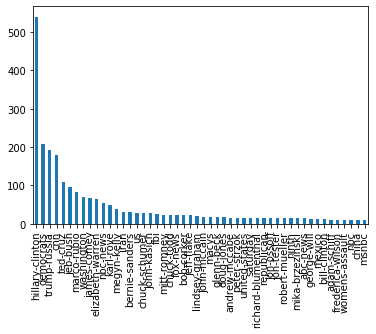

In [10]:
insult_target_ent_type['text'].value_counts()[0:50].plot(kind='bar')

## Insults form about half of all Trump's tweets. 
Subsequent analysis will show how Trump has used Twitter mostly as a tool to attack his opponents and defend himself against controversy, for example allegations of his connections to Russia during the 2016 election and scrutiny over his tax records. Despite his polarising stances on political issues such as his calls to "build a wall" and his trade war with China however, tweets about policy only form a small proportion of topics that he tweets about. Mostly, he calls out "fake news" constantly, seemingly as a way to demean the accusations of his prosecutors. 

Looks like Trump uses Twitter as his personal mouthpiece. This is unlike what other politicians usually do, which is to use social media to socialize policies they want support for or to polish their own image. 
TODO: contrast to Obama's tweets? 

In [11]:
all_twts = clean_all_tweets_data('realdonaldtrump.csv')

In [12]:
tweet_count_ym = all_twts.groupby('year_month').size().reset_index().rename(columns={0: 'count_tweets'})

In [13]:
total_tweets = alt.Chart(tweet_count_ym).mark_bar(opacity=0.3, color='grey').encode(
    alt.X('year_month:T',axis=alt.Axis(title='Date', grid=False)),
    alt.Y('count_tweets:Q', axis=alt.Axis(title='Number of tweets', grid=False)),
    tooltip = 'count_tweets').properties(
    width=600,
    height=400
)

## Insults versus total tweets

In [14]:
insults + total_tweets

alt.LayerChart(...)

In [15]:
def get_mentions(x):
    return Counter(x['mentions'])

def filter_mentions(x):
    for k, v in x.items():
        if v > 1 and str(k)!='nan':
            return {k:v}
mentions = all_twts.groupby('year_month').apply(get_mentions)
mentions = mentions.reset_index().rename(columns={0:'mentions_counter'})

In [16]:
mentions['filtered'] = mentions['mentions_counter'].apply(filter_mentions)
mentions.head()

,year_month,mentions_counter,filtered
0,2009-05,{nan: 21},None
1,2009-06,{nan: 11},None
2,2009-07,{nan: 5},None
3,2009-08,"{nan: 4, '@IvankaTrump': 1, '@9pm': 2}",{'@9pm': 2}
4,2009-09,{nan: 3},None


In [17]:
obama = all_twts[(all_twts['content'].str.contains('[oO]bama')) | (all_twts['content'].str.contains('@BarackObama'))| (all_twts['content'].str.contains('[bB]arack'))][['content','year_month']]

In [18]:
obama_count = obama.groupby('year_month').count().reset_index()
obama_count_viz = alt.Chart(obama_count).mark_bar(opacity=0.3, color='blue').encode(
    alt.X('year_month:T',axis=alt.Axis(title='Date', grid=False)),
    alt.Y('content:Q', axis=alt.Axis(title='Number of tweets', grid=False)),
    tooltip = 'content').properties(
    width=600,
    height=400,
)

In [19]:
hillary = all_twts[(all_twts['content'].str.contains('[hH]illary')) | (all_twts['content'].str.contains('@HillaryClinton'))| (all_twts['content'].str.contains('[cC]linton'))][['content','year_month']]

In [20]:
hillary_count = hillary.groupby('year_month').count().reset_index()
hillary_count_viz = alt.Chart(hillary_count).mark_bar(opacity=0.3, color='red').encode(
    alt.X('year_month:T',axis=alt.Axis(title='Date', grid=False)),
    alt.Y('content:Q', axis=alt.Axis(title='Number of tweets', grid=False)),
    tooltip = 'content').properties(
    width=600,
    height=400)

In [21]:
jeb = all_twts[(all_twts['content'].str.contains('[jJ]eb')) | (all_twts['content'].str.contains('@JebBush'))| (all_twts['content'].str.contains('[jJ]eb [bB]ush'))][['content','year_month']]
jeb_count = jeb.groupby('year_month').count().reset_index()
jeb_count_viz = alt.Chart(jeb_count).mark_bar(opacity=0.3, color='purple').encode(
    alt.X('year_month:T',axis=alt.Axis(title='Date', grid=False)),
    alt.Y('content:Q', axis=alt.Axis(title='Number of tweets', grid=False)),
    tooltip = 'content').properties(
    width=600,
    height=400)

In [22]:
cruz = all_twts[(all_twts['content'].str.contains('[tT]ed')) | (all_twts['content'].str.contains('@tedcruz'))| (all_twts['content'].str.contains('[tT]ed [cC]ruz'))][['content','year_month']]
cruz_count = cruz.groupby('year_month').count().reset_index()
cruz_count_viz = alt.Chart(cruz_count).mark_bar(opacity=0.3, color='green').encode(
    alt.X('year_month:T',axis=alt.Axis(title='Date', grid=False)),
    alt.Y('content:Q', axis=alt.Axis(title='Number of tweets', grid=False)),
    tooltip = 'content').properties(
    width=600,
    height=400)

# Tweets against Democrats (pink and purple) and tweets against Republicans (grey and green)
Attacks rise and fall with events (eg. Obama presidency, Hillary's presidential campaign are periods where Trump was particularly aggresive against them 
Purple: Obama
Pink: Clinton
Grey: Jeb Bush
Green: Ted Cruz

In [23]:
democrats = obama_count_viz + hillary_count_viz
republicans = cruz_count_viz + jeb_count_viz
alt.vconcat(democrats & republicans)

alt.VConcatChart(...)

During his presidency, most of Trump's tweets became about proclaiming fake news in the media, rather than 

* there's another hypothesis that Trump also mainly used Twitter as a way to build support amongst the Republican voting population, though this needs further investigation

In [56]:
def get_orgs_mentions(subset):
    pers = []
    orgs = []
    for s in subset['entities']:
        for ent in s:
            if ent['label'] == 'ORG':
                orgs.append(ent['text'].lower())
    return orgs

def get_topics(year):
    subset = all_twts[all_twts['year']==year]
    ym_org_ents = subset.groupby('year_month').apply(get_orgs_mentions)
    ym_org_ents = ym_org_ents.reset_index().rename(columns={0:'org_ents'})
    ym_org_ents['topics'] = pd.Series([count_org_mentions(y) for y in ym_org_ents['org_ents']])
    topics = make_df(ym_org_ents)
    return topics

In [75]:
all_twts_ents = [nlp(t) for t in all_twts['content']]
ents = pd.Series([get_ents(doc) for doc in all_twts_ents], name='entities')
all_twts = pd.concat([all_twts,ents], axis=1)

In [72]:
topics_2015 = get_topics(2015)
topics_2016 = get_topics(2016)
topics_2017 = get_topics(2017)
topics_2018 = get_topics(2018)
topics_2019 = get_topics(2019)
topics_2020 = get_topics(2020)

In [74]:
a = alt.Chart(topics_2015).mark_bar().encode(
    x='topic:N',
    y='mean(mentions):Q',
    color='topic:N',
    column='topic:N')
b = alt.Chart(topics_2016).mark_bar().encode(
    x='topic:N',
    y='mean(mentions):Q',
    color='topic:N',
    column='topic:N')
c = alt.Chart(topics_2017).mark_bar().encode(
    x='topic:N',
    y='mean(mentions):Q',
    color='topic:N',
    column='topic:N')
d = alt.Chart(topics_2018).mark_bar().encode(
    x='topic:N',
    y='mean(mentions):Q',
    color='topic:N',
    column='topic:N')
e = alt.Chart(topics_2019).mark_bar().encode(
    y='mean(mentions):Q',
    color='topic:N',
    column='topic:N')
alt.vconcat(a,b,c,d,e)

alt.VConcatChart(...)

In [88]:
import sys
!{sys.executable} -m pip install stanza

     |████████████████████████████████| 282 kB 5.8 MB/s eta 0:00:01


In [91]:
import stanza
stanza.download('en')

In [92]:
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

2021-03-14 18:15:25 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-03-14 18:15:25 INFO: Use device: cpu
2021-03-14 18:15:25 INFO: Loading: tokenize
2021-03-14 18:15:25 INFO: Loading: sentiment
2021-03-14 18:15:26 INFO: Done loading processors!


In [91]:
doc = nlp('I love that they banned Mox Opal')
for i, sentence in enumerate(doc.sentences):
    print(i, sentence.sentiment)

2021-03-14 18:14:13 INFO: Downloading default packages for language: en (English)...
2021-03-14 18:14:13 INFO: File exists: /Users/jeanne/stanza_resources/en/default.zip.
2021-03-14 18:14:16 INFO: Finished downloading models and saved to /Users/jeanne/stanza_resources.
2021-03-14 18:14:16 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-03-14 18:14:17 INFO: Use device: cpu
2021-03-14 18:14:17 INFO: Loading: tokenize
2021-03-14 18:14:17 INFO: Loading: sentiment
2021-03-14 18:14:17 INFO: Done loading processors!


0 2


In [94]:
stanza_sents = [stanza_nlp(c) for c in all_twts['content']]

In [113]:
from statistics import mean
sentiments = []
for sent in stanza_sents:
    sentences_list = []
    for s in sent.sentences:
        sentences_list.append(s.sentiment)
    sentiments.append(mean(sentences_list))
        

In [116]:
all_twts['sentiment'] = sentiments

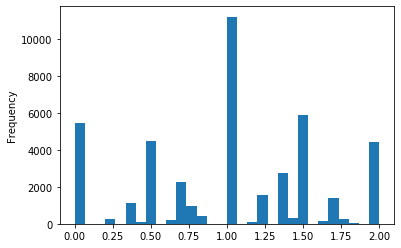

In [117]:
all_twts['sentiment'].plot(kind='hist', bins=30)

# Overview of targets of insults

Who are the people he has targeted the most?  
Unsurprisingly, Hillary Clinton, his political opponent in the 2016 presidential election, tops the list. 
However, not all who are the target of his insults are democrats. Many come from his own party - Jeb Bush and Ted Cruz to name a few. 

In [7]:
ner = [nlp(t) for t in insults_df['target'].fillna('NAN')]

In [8]:
insult_target_ent_type = pd.DataFrame([{'label':ent.label_, 'text':ent.text} for n in ner[0:5000] for ent in n.ents if n.ents])

In [9]:
base = alt.Chart(insult_target_ent_type).mark_bar().encode(
    x ='label',
    y = 'text',
    color = 'count(text):O',
    tooltip = 'count(text):Q')

base

alt.Chart(...)